# Evaluating Microsoft Table Transformer Model
Models purpose is to recognise the tables structure and return image areas of the table cells to then use OCR to extract the actual table text.
- Paper: https://arxiv.org/abs/2110.00061
- Huggingface: https://huggingface.co/docs/transformers/main/en/model_doc/table-transformer
- Github: https://github.com/microsoft/table-transformer

In [18]:
from huggingface_hub import hf_hub_download
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image, ImageDraw

image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [19]:
file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="example_pdf.png")
image = Image.open(file_path).convert("RGB")

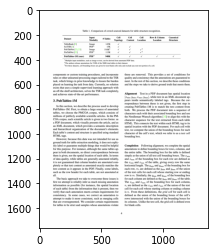

In [20]:
# print the test image
import matplotlib.pyplot as plt
plt.imshow(image)

In [22]:


inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

     # Draw a red box around the detected object
    x_min, y_min, x_max, y_max = box
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)

image.show()

Detected table with confidence 1.0 at location [202.1, 210.59, 1119.22, 385.09]


In [7]:
# Plotting the table cells and their corresponding values
def plot_table_cells(table, table_cells, table_values):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(table)
    for i, cell in enumerate(table_cells):
        ax.text(cell[0], cell[1], table_values[i], color='red', fontsize=20)
    plt.show()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.5:
        print(label)
        print(box)
        print(score)
        plot_table_cells(table, box, label)

tensor(0)
tensor([ 202.0956,  210.5885, 1119.2213,  385.0860], grad_fn=<UnbindBackward0>)
tensor(0.9998, grad_fn=<UnbindBackward0>)


NameError: name 'table' is not defined